# Comparison of groups

In this notebook, we are going to look at various examples of how to use statistical tests to compare two or more groups.

## Setting up

Loading packages. (Note the new import of the `stats` module from `scipy`.)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

We are going to use the adult dataset as our example, so we fetch it from the UCI ML repo. (It is also on moodle.)

In [2]:
from ucimlrepo import fetch_ucirepo 
  
adult_temp = fetch_ucirepo(id=2) 
  
X = adult_temp.data.features 
y = adult_temp.data.targets 
X["income"] = y
adult = X

In [3]:
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Mann-Whitney U test

Let us look at the age of women and men in the dataset.

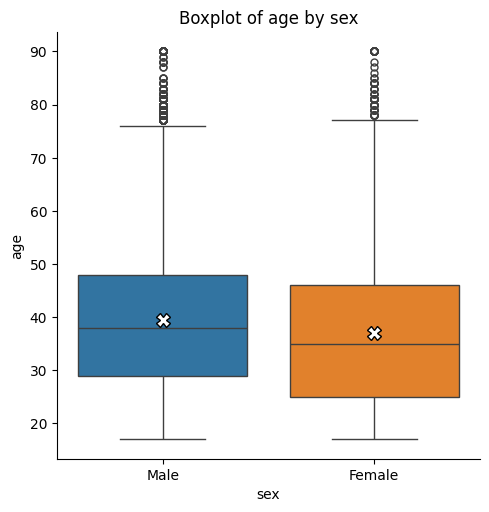

In [5]:
sns.catplot(x="sex", y = "age", hue = "sex", data = adult, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of age by sex")
plt.show()

From the box plot, it is unclear whether the mean or medians of the two groups are truly different. So doing a statistical test is certainly warranted. Let us look closer at the two distributions with histograms.

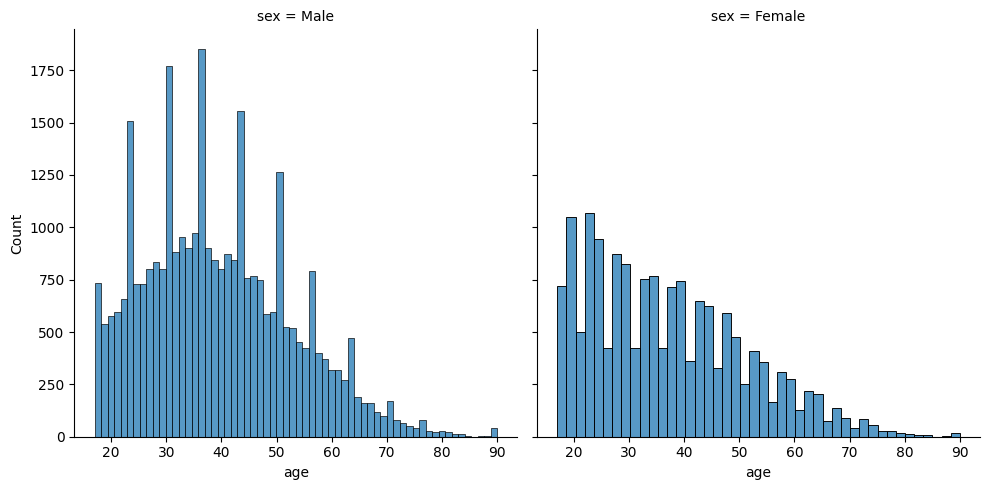

In [6]:
g=sns.FacetGrid(adult, col="sex", height = 5)
g.map(sns.histplot, "age")

The male ages do looks somewhat normal, with some level of right skewness as well as some strange spikes. The female ages do not look normally distributed. Thus, while the sample sizes in both groups are large, the Mann-Whitney U test might be a sensible choice.

In [7]:
stats.mannwhitneyu(adult[adult["sex"]=="Female"]["age"], adult[adult["sex"]=="Male"]["age"])

MannwhitneyuResult(statistic=np.float64(231802174.0), pvalue=np.float64(5.021115950651662e-109))

There is clearly a statistical significant difference, as the p-value is well below 0.05. More formally, as the p-value is below our prior set significance level of 0.05, we reject the null-hypothesis that the two samples (of female and male ages) come from the same distribution in favor of the alternative hypothesis that the two data samples comes from different distributions.

Estimates of the two populations medians, we can get by taking the medians of the two samples:

In [8]:
adult.groupby("sex")["age"].median()

sex
Female    35.0
Male      38.0
Name: age, dtype: float64

The large sample size, in this case, help us ensure statistical significance. What would happen if we only looked at the first 100 female and first 100 male:

In [9]:
first100femaleAges = adult[adult["sex"]=="Female"].iloc[:100]["age"]
first100maleAges = adult[adult["sex"]=="Male"].iloc[:100]["age"]
first100femaleAgesDF = pd.DataFrame({"age": first100femaleAges, "sex": ["Female"]*100})
first100maleAgesDF = pd.DataFrame({"age": first100maleAges, "sex": ["Male"]*100})
first200AgesDF = pd.concat([first100femaleAgesDF,first100maleAgesDF])

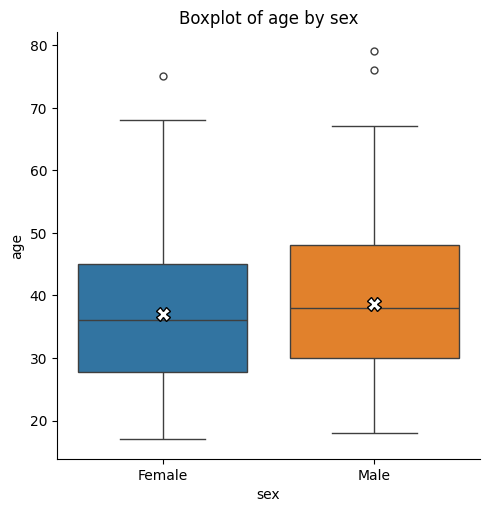

In [10]:
sns.catplot(x="sex", y = "age", hue = "sex", data = first200AgesDF, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of age by sex")
plt.show()

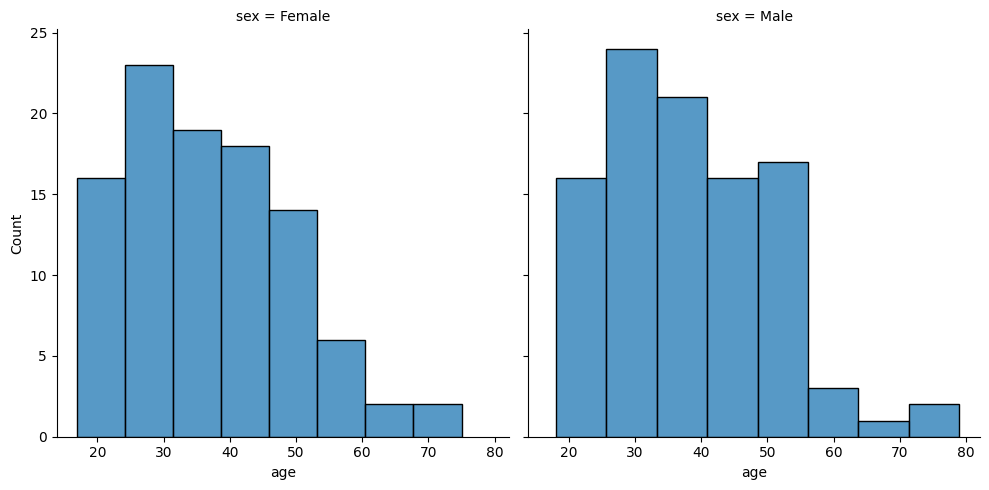

In [11]:
g=sns.FacetGrid(first200AgesDF, col="sex", height = 5)
g.map(sns.histplot, "age")

In [12]:
stats.mannwhitneyu(first100femaleAges, first100maleAges)

MannwhitneyuResult(statistic=np.float64(4613.5), pvalue=np.float64(0.34541152100568395))

As the p-value is well above 0.05 we cannot reject the null hypothesis that these two data sample come from the same distribution. Looking at the histogram above, we see that they are somewhat different, but there is just not enough data to truly differentiate the first 100 females from the first 100 males - the difference could be due to chance.

## Kruskal-Wallis test

We can also try to apply the Kruskal-Wallis test. It requires that the two distributions are of similar shape and have the same skewness, however. Both the distributions are right-skewed, but they do not have the exact same shape. But let us try the test anyway.

In [ ]:
g=sns.FacetGrid(adult, col="sex", height = 5)
g.map(sns.histplot, "age", bins = 12)

In [ ]:
stats.kruskal(adult[adult["sex"]=="Female"]["age"], adult[adult["sex"]=="Male"]["age"])

We clearly see significance again, maybe not surprisingly. We can here also try with only 100 in each group:

In [ ]:
stats.kruskal(first100femaleAges, first100maleAges)

Here we get no significance again.

## Wilcoxon Signed-Rank Test

To use the Wilcoxon Singed-Rank test we need paired data. However, we do not have any paired data in the adult dataset. Thus, we will look at another data example. This data comes from exercise 8.5.7 of Samuels, Myra L., Witmer, Jeffrey A., and Schaffner, Andrew A. (2016). *Statistics for the Life Sciences*, 
Fifth Edition, Global Edition, Pearson.

In the example, 10 subjects had their myocardial blood flow measured before and after consuming caffeine.

In [ ]:
caffeineBloodData = pd.DataFrame({"beforeCaffeine": [3.43, 3.08, 3.07, 2.65, 2.49, 2.33, 2.31, 2.24, 2.17, 1.34],
                                  "afterCaffeine": [2.72, 2.94, 1.76, 2.16, 2.00, 2.37, 2.35, 2.26, 1.72, 1.22]})
caffeineBloodData

The null-hypothesis is now that the intake of caffeine do not have effect any on the blood flow, while the alternative hypothesis is that there is a difference between before and after caffeine intake in the blood flow. Note how this data is paired, as we measure the same person before and after. Moreover, if we plot the difference of before and after in a histogram, we see the difference is not normally distributed:

In [ ]:
sns.histplot(data = caffeineBloodData, x = caffeineBloodData["beforeCaffeine"] - caffeineBloodData["afterCaffeine"])
plt.show()

Thus, this example is an obvious case for a Wilcoxon Signed-Rank test: 

In [ ]:
stats.wilcoxon(caffeineBloodData["beforeCaffeine"], caffeineBloodData["afterCaffeine"])

We see that the p-value is just below 0.05, so if we had chosen that as our significance level, we do find statistical evidence to reject the null-hypothesis of not effect of caffeine. It is not strong evidence, though!

There is not a good standard plot for paired data, but a scatter plot can be used:

In [ ]:
sns.scatterplot(data = caffeineBloodData, x = "beforeCaffeine", y = "afterCaffeine")
plt.title("Scatterplot of blood flow before and after Caffeine intake")
plt.plot([0, 3.5], [0, 3.5], color='green', linestyle='dashed')
plt.xlabel("Before")
plt.ylabel("After")
plt.show()

As most point lay below the identity line here, it suggest that the blood flow actually goes down after the caffeine intake.

## Independent/student t-test

As age does not seem to be normally distributed, we look at the hours-per-week instead. Hence, we are now interested in whether there is a difference in the average number of hours per week women and men work. Thus, the null-hypothesis will be there is no difference.

Let us first look at the two distribution:

In [ ]:
g=sns.FacetGrid(adult, col="sex", height = 5)
g.map(sns.histplot, "hours-per-week", bins = 12)
plt.show()

They seem close to normally distributed without any significant outliers. (There are also statistical tests to test whether some sample data actually come from a normal distribution, but those tests are beyond the scope of this course.) Thus, we can use a student t-test to test whether there is a difference in mean between men and women in regard to working hours per week. Let us first look at a boxplot to visually compare the means:

In [ ]:
sns.catplot(x="sex", y = "hours-per-week", hue = "sex", data = adult, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of hours-per-week by sex")
plt.show()

There clearly looks like there is a difference, but let us run the test:

In [ ]:
stats.ttest_ind(adult[adult["sex"]=="Female"]["hours-per-week"], adult[adult["sex"]=="Male"]["hours-per-week"])

The p-value is basically 0, so clearly it is below our pre-specified significance level of 0.05. Thus, we reject our null-hypothesis (there is no difference in the average amount of hours women and men work per week) in favor of the alternative hypothesis that there is a difference.

Note that the alternative hypothesis does not specify in which direction the difference is, in other words the alternative hypothesis is 'two-sided' and we have only showed there is a difference. However, we could have chosen as an alternative hypothesis that the average working hours per week was less for women. To do this, we specify the argument `alternative` in the call to our test function:

In [ ]:
stats.ttest_ind(adult[adult["sex"]=="Female"]["hours-per-week"], adult[adult["sex"]=="Male"]["hours-per-week"], alternative = 'less')

The p-value is still basically zero, but now we have statistical evidence in favor of the alternative hypothesis that women work fewer hours on average pr. week. (In the particular historic population, this data was sampled from.)

If we have chosen the alternative hypothesis that women work more hours per week on average, we would not have gotten a p-value low enough to ensure statistical significance:

In [ ]:
stats.ttest_ind(adult[adult["sex"]=="Female"]["hours-per-week"], adult[adult["sex"]=="Male"]["hours-per-week"], alternative = 'greater')

Let us now try with smaller samples of the first 100 females and males, for the fun of it:

In [ ]:
first100femaleHPW = adult[adult["sex"]=="Female"].iloc[:100]["hours-per-week"]
first100maleHPW = adult[adult["sex"]=="Male"].iloc[:100]["hours-per-week"]
first100femaleHPWDF = pd.DataFrame({"hours-per-week": first100femaleHPW, "sex": ["Female"]*100})
first100maleHPWDF = pd.DataFrame({"hours-per-week": first100maleHPW, "sex": ["Male"]*100})
first200HPWDF = pd.concat([first100femaleHPWDF,first100maleHPWDF])

In [ ]:
g=sns.FacetGrid(first200HPWDF, col="sex", height = 5)
g.map(sns.histplot, "hours-per-week", bins = 12)
plt.show()

In [ ]:
sns.catplot(x="sex", y = "hours-per-week", hue = "sex", data = first200HPWDF, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

In [ ]:
stats.ttest_ind(first100femaleHPW, first100maleHPW)

We again get a statistical significant difference eventhough the strength is much less than before.

## Paried t-test

Again we need some paired data, and we will again use data from Samuels, Myra L., Witmer, Jeffrey A., and Schaffner, Andrew A. (2016). *Statistics for the Life Sciences*, Fifth Edition, Global Edition, Pearson. This time data from Example 8.2.4. Here the "Gumminess" of a new type of cheese is measured 7 days and 30 days after production.

In [ ]:
cheeseData = pd.DataFrame({"day7": [7296, 6325, 8003, 5013, 4637, 8525, 9445, 8794, 5213, 3399],
                           "day30": [5544, 6120, 5720, 2508, 3743, 5272, 7189, 6794, 4409, 4083]})
cheeseData

Let us first visualize the data in a scatterplot:

In [ ]:
sns.scatterplot(data = cheeseData, x = "day7", y = "day30")
plt.title("Scatterplot of cheese gumminess after day 7 and day 30")
plt.plot([0, 10000], [0, 10000], color='green', linestyle='dashed')
plt.xlabel("day7")
plt.ylabel("day30")
plt.show()

It looks like the measure of gumminess goes down from day 7 to day 30. Let us plot the differences between the to days:

In [ ]:
sns.histplot(data = cheeseData, x = cheeseData["day7"] - cheeseData["day30"])
plt.xlabel("difference in gumminess")
plt.show()

It does not obviouslt look normally distributed, but for the sake of the example, let us assume so. Thus, we will perform a paired t-test:

In [ ]:
stats.ttest_rel(cheeseData["day7"], cheeseData["day30"])

The p-value here is actually small enough that we can conclude that there is statistical significant evidence that there is a difference in the cheese gumminess between day 7 and day 30.

## ANOVA

We will look at whether there is a difference across marital-status in regard to hours-per-week.

In [ ]:
adult.groupby("marital-status")["hours-per-week"].describe()

Let us also visualize the data using boxplots and histograms.

In [ ]:
sns.catplot(y="hours-per-week", hue = "marital-status", data = adult, kind="box", height = 7,
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

In [ ]:
g=sns.FacetGrid(adult, row="marital-status", height = 5)
g.map(sns.histplot, "hours-per-week", bins = 16)
plt.show()

The distribution of hours-per-week is not perfectly normally distributed for the different groups, but it is not completely off. Moreover, note that there are more than two values of the categorical variable `marital-status`, thus we cannot use the student t-test as before. Instead, we need to use the ANOVA test.

For simplicity, we will only look at the five most common marital-status

In [ ]:
stats.f_oneway(adult[adult["marital-status"]=="Divorced"]["hours-per-week"],
               adult[adult["marital-status"]=="Married-civ-spouse"]["hours-per-week"],
               adult[adult["marital-status"]=="Never-married"]["hours-per-week"],
               adult[adult["marital-status"]=="Separated"]["hours-per-week"],
               adult[adult["marital-status"]=="Widowed"]["hours-per-week"])         

A p-value of 0 clearly tell is that there is a difference, however it does not tell us which groups of marital status that have different working hours per week. Further tests would be need to decide that.

## Chi-square Test

We can use the Chi-square Test to test categorical distributions against baseline categorical distribution. For instance, we can test for women whether every level of education is equally likely. To do this, we will compare the actual sample distribution of the variable `education` for women with the expected distribution under the null-hypothesis, which in this case would be the uniform distribution.

We get the sample distribution of `education` for woman using `.value_counts` and plot it using Seaborn's `countplot`:

In [ ]:
adult[adult["sex"]=="Female"]["education"].value_counts()

In [ ]:
sns.countplot(adult[adult["sex"]=="Female"], y = "education")
plt.show()

In [ ]:
femaleEducationLevels = adult[adult["sex"]=="Female"]["education"].value_counts().array
femaleEducationLevels

It clearly do not look like every educational level is equally likely, but let us make the test anyway. First we need to calculate the expected values of each educational level under the uniform distribution. Note the probability of each level under the uniform distribution is `1 / len(femaleEducationLevels)`.

In [ ]:
expectedFemaleEducationLevels = np.repeat(1 / len(femaleEducationLevels), len(femaleEducationLevels))
expectedFemaleEducationLevels = expectedFemaleEducationLevels * sum(femaleEducationLevels)
expectedFemaleEducationLevels

We can now perform a chi-square test to test whether these two arrays represent the same distribution:

In [ ]:
stats.chisquare(femaleEducationLevels, expectedFemaleEducationLevels)

The p-value is essentially zero, which is well below a significance level of 0.05. Thus we reject the null-hypothesis that every educational level is equally likely for women (which is well in line with what we saw in the above barplot).

The next question of interest could be whether the distribution of different level of education for women is different from that of men. Or, put in other words, is there any correlation between the two categorical variables `sex` and `educations`? We can also use the chi-square test to test for this. First, let us look at the cross table of the two variable `sex` and `educations`, which is also called the contingency table.

In [ ]:
pd.crosstab(adult["sex"], adult["education"])

It is not clearly from these numbers whether the distributions are different, also because the total number of females and total number of males in the dataset are quite different. However, we can also visualize the two distributions by a barplot using `sex` as the `hue` argument:

In [ ]:
sns.countplot(adult, y = "education", hue = "sex")
plt.show()

From this, it is still hard to judge if there is a difference in educational level between men and woman, so we will do a chi-square test. Note that from the cross table it is clear that we have more than 5 observations in each cell, so the chi-square test is applicable. 

Essentially, what we want to do is again to compare these observed numbers to the expected numbers if there were no correlation between the two variables. For each cell of this table, the expected value is the total sum of its row multiplied by the total sum of its column. However, if we use the SciPy function `stats.chi2_contingency` instead of the `stats.chisquare` function we can just pass in the original cross table of observations and the table of expected values will implicitly be calculated for us along with the p-value.

In [ ]:
stats.chi2_contingency(pd.crosstab(adult["sex"], adult["education"]))

Here we get a p-value well below a significance level of 0.05, and we reject the null-hypothesis that the two categorical variables `sex` and `education` do not correlate. Thus, we have statistical significant support for the alternative hypothesis that there is a difference in educational level across the two genders. (We just do not know at this put what the difference amount to...)

Note here, that the fact that we get significance is also due to our relatively large sample size. If we look at the 100 first rows of the adult dataset, or the first 1000 or first 2000 rows, we do not get a signficance. We need at least the first 3000 rows of this dataset to get a statistical significance.

In [ ]:
stats.chi2_contingency(pd.crosstab(adult.iloc[0:100]["sex"], adult.iloc[0:100]["education"]))

In [ ]:
stats.chi2_contingency(pd.crosstab(adult.iloc[0:1000]["sex"], adult.iloc[0:1000]["education"]))

In [ ]:
stats.chi2_contingency(pd.crosstab(adult.iloc[0:2000]["sex"], adult.iloc[0:2000]["education"]))

In [ ]:
stats.chi2_contingency(pd.crosstab(adult.iloc[0:3000]["sex"], adult.iloc[0:3000]["education"]))

In [ ]:
stats.chi2_contingency(pd.crosstab(adult.iloc[0:4000]["sex"], adult.iloc[0:4000]["education"]))